In [1]:
import numpy as np
import pandas as pd

In [2]:
movie_data = pd.read_csv("/kaggle/input/movierec/movies.csv")

In [3]:
movie_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
movie_data.shape

(9742, 3)

In [5]:
rating_data=pd.read_csv("/kaggle/input/movierec/ratings.csv")

In [6]:
rating_data.shape

(100836, 4)

In [7]:
rating_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [8]:
unique_user_ids = rating_data['userId'].nunique()

In [9]:
unique_user_ids

610

In [10]:
print("Number of unique userId values in ratings.csv:", unique_user_ids)

Number of unique userId values in ratings.csv: 610


In [11]:
movie_ratings_count = rating_data.groupby('movieId')['rating'].count()

In [12]:
movie_ratings_count

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

In [13]:
max_rated_movie = movie_ratings_count.idxmax()

In [14]:
print("Movie with the maximum number of user ratings (movieId):", max_rated_movie)

Movie with the maximum number of user ratings (movieId): 356


In [15]:
tags_data=pd.read_csv("/kaggle/input/movierec/tags.csv")

In [16]:
tags_data

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [17]:
matrix_movie_id = movie_data[movie_data['title'] == 'Matrix, The (1999)']['movieId'].iloc[0]


In [18]:
matrix_tags = tags_data[tags_data['movieId'] == matrix_movie_id]

In [19]:
print("Tags for 'Matrix, The (1999)':")
print(matrix_tags)

Tags for 'Matrix, The (1999)':
      userId  movieId                 tag   timestamp
815      424     2571        martial arts  1457842912
816      424     2571              sci-fi  1457842899
1646     474     2571  alternate universe  1137204991
2794     537     2571          philosophy  1424141098
2795     537     2571    post apocalyptic  1424141101


In [20]:
terminator2_movie_id = movie_data[movie_data['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]

In [21]:
terminator2_ratings = rating_data[rating_data['movieId'] == terminator2_movie_id]

In [22]:
average_rating = terminator2_ratings['rating'].mean()

In [23]:
print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


In [24]:
import matplotlib.pyplot as plt

In [25]:
fight_club_movie_id = movie_data[movie_data['title'] == 'Fight Club (1999)']['movieId'].iloc[0]

In [26]:
fight_club_ratings = rating_data[rating_data['movieId'] == fight_club_movie_id]

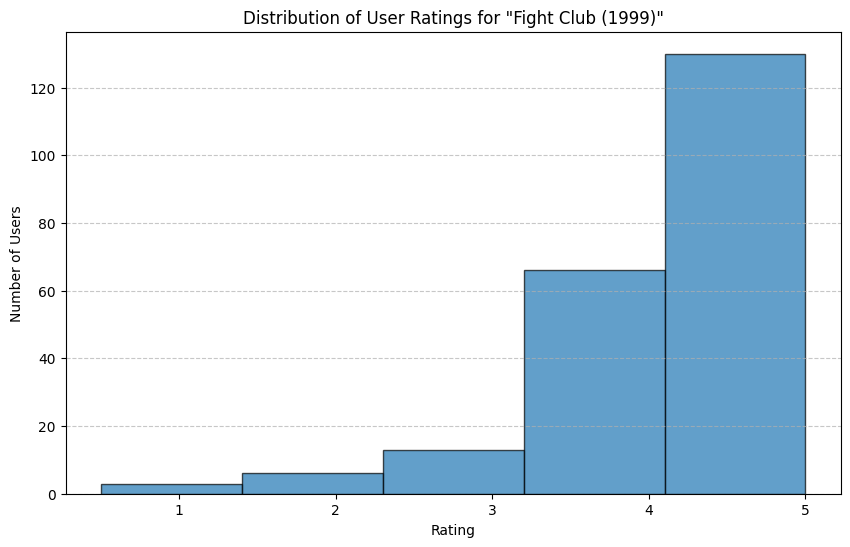

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:

# Step 1: Group user ratings based on movieId and apply aggregation operations
grouped_ratings = rating_data.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']


In [29]:
# Step 2: Apply inner join on dataframes created from movies.csv and the grouped df from step 1
merged_data = pd.merge(movie_data, grouped_ratings, on='movieId', how='inner')

In [30]:
merged_data

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [31]:
# Step 3: Filter only those movies which have more than 50 user ratings
filtered_data = merged_data[merged_data['rating_count'] > 50]

In [32]:
filtered_data.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [33]:
filtered_data

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [34]:
most_popular_movie = filtered_data[filtered_data['rating_mean'] == filtered_data['rating_mean'].max()]

In [35]:
print("Most popular movie based on average user ratings:")
print(most_popular_movie[['title', 'rating_mean']])

Most popular movie based on average user ratings:
                                title  rating_mean
277  Shawshank Redemption, The (1994)     4.429022


In [36]:
top_movies_by_rating_count = filtered_data.sort_values(by='rating_count', ascending=False)

In [37]:
top_5_movies = top_movies_by_rating_count.head(5)

In [38]:
print("Top 5 popular movies based on number of user ratings:")
print(top_5_movies[['title', 'rating_count']])

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [39]:
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]

In [40]:
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

In [41]:
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

In [42]:
print("Third most popular Sci-Fi movie based on number of user ratings:")
print(third_most_popular_sci_fi_movie[['title', 'rating_count']])

Third most popular Sci-Fi movie based on number of user ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [43]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [44]:
links_data=pd.read_csv("/kaggle/input/movierec/links.csv")

In [45]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)  # FILL_IN_THE_BLANK: Replace with 'get'
    soup = BeautifulSoup(response.text, 'html.parser')  # FILL_IN_THE_BLANK: Replace with 'BeautifulSoup'
    imdb_rating = soup.find('span', attrs={'data-testid': 'hero-rating-bar__score'})  # FILL_IN_THE_BLANK: Replace with 'span'
    return imdb_rating.text if imdb_rating else np.nan
